# Pyber Ride Sharing

# Analysis
    1 - As expected urban areas drive the demand for ride sharing services
    2 - While demand is highest in urban areas suburban areas have a high share of total fares
    3 - Rural demand outpaces the amount of drivers in rural areas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

file = "city_data.csv"
city_df = pd.read_csv(file)
file2 = "ride_data.csv"
ride_df = pd.read_csv(file2)
city_df.head()


In [255]:
file_df = pd.merge(ride_df, city_df, on="city")
file_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [357]:
pyber = file_df[["city"]]
pyber = pyber.groupby("city").count()
pyber["Avg Fare"] = file_df.groupby(["city"])["fare"].mean()
pyber["Rides per city"] = file_df.groupby(["city"])["ride_id"].count()
pyber["Total Fare"] = file_df.groupby(["city"])["fare"].sum()
#pyber["Drivers per city"] = file_df.groupby(["city"])["driver_count"].mean()
pyber.head()
pyber["city"] = pyber.index
#pyber.head()

combined = pd.merge(pyber, city_df, on="city")
combined.head()

,Avg Fare,Rides per city,Total Fare,city,driver_count,type
0,23.928710,31,741.79,Alvarezhaven,21,Urban
1,20.609615,26,535.85,Alyssaberg,67,Urban
2,37.315556,9,335.84,Anitamouth,16,Suburban
3,23.625000,22,519.75,Antoniomouth,21,Urban
4,21.981579,19,417.65,Aprilchester,49,Urban


In [264]:
urban = combined.loc[(combined["type"] == "Urban")]
suburban = combined.loc[(combined["type"] == "Suburban")]
rural = combined.loc[(combined["type"] == "Rural")]
rural.head()

,Avg Fare,Rides per city,Total Fare,city,driver_count,type
17,33.660909,11,370.27,East Leslie,9,Rural
18,39.053000,10,390.53,East Stephen,6,Rural
19,33.244286,7,232.71,East Troybury,3,Rural
21,30.043750,8,240.35,Erikport,3,Rural
25,32.002222,9,288.02,Hernandezshire,10,Rural


# Bubble Plot of Ride Sharing Data

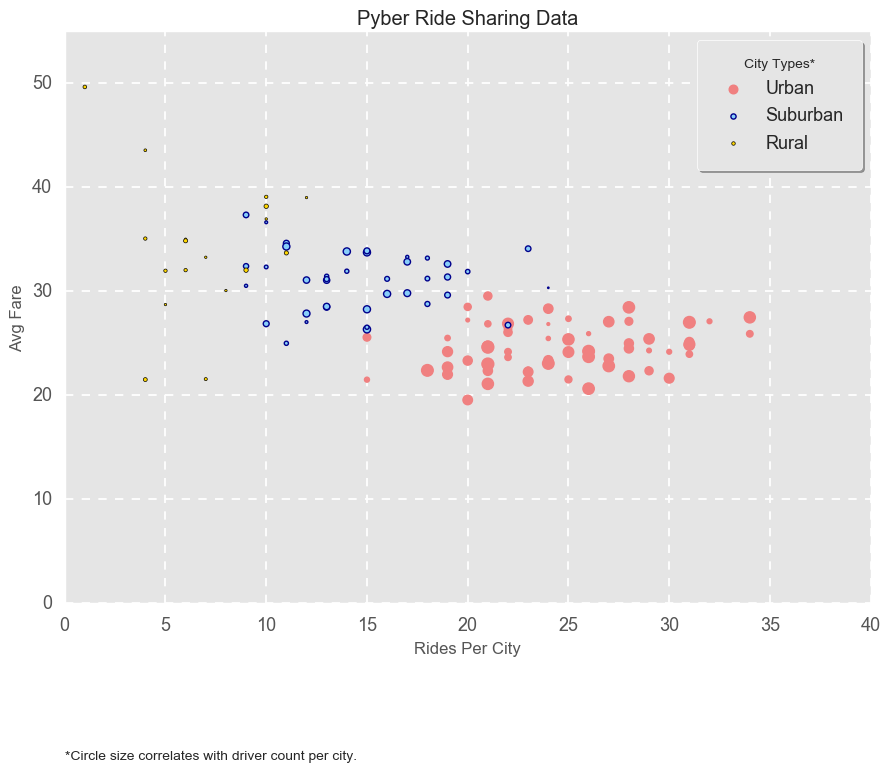

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [355]:
fig = plt.figure(dpi=100)

plt.scatter(urban["Rides per city"], urban["Avg Fare"], linewidths = 1, alpha= 1, label = "Urban", color = 'lightcoral', edgecolor='lightcoral', s=urban["driver_count"], edgecolors="lightcoral")

plt.scatter(suburban["Rides per city"], suburban["Avg Fare"], linewidths = 1, alpha=1, label = "Suburban", color = 'lightskyblue', edgecolor='darkblue', s=suburban["driver_count"], edgecolors="darkblue")

plt.scatter(rural["Rides per city"], rural["Avg Fare"], linewidths = .5, alpha=1, label = "Rural", color = 'gold', edgecolor='black', s=rural["driver_count"], edgecolors="black")

plt.ylim(0, 55)
plt.xlim(0, 40)
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Rides Per City")
plt.ylabel("Avg Fare")

plt.text(0, -15, "*Circle size correlates with driver count per city.")
plt.legend(fancybox = True,loc='upper right', title = 'City Types*', frameon=True, borderpad = 1, shadow=True)


plt.grid(which='major', color='white', linestyle='--')
plt.style.use('ggplot')

plt.show()
print(plt.style.available)

In [344]:
file_df = pd.merge(ride_df, city_df, on="city")
file_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


# Total Rides by City

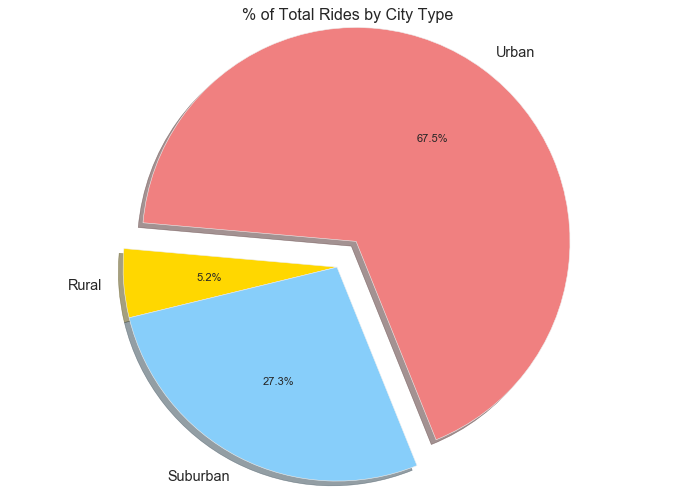

In [345]:
ride_file = file_df.groupby(["type"])
type_count = ride_file["ride_id"].count()

explode = (0, 0, .15)
colors = ['gold', 'lightskyblue', 'lightcoral']

type_count = type_count.plot(kind="pie", explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=175, title=("% of Total Rides by City Type"))

type_count.set_ylabel(" ")
plt.axis("equal")
plt.show()

# Total Fares by City

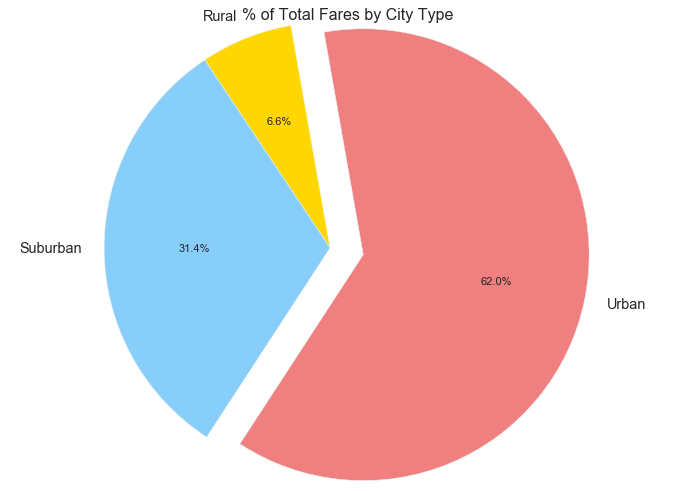

In [346]:
sum_file = file_df.groupby(["type"])
sum_type = sum_file["fare"].sum()

explode = (0, 0, .15)
colors = ['gold', 'lightskyblue', 'lightcoral']

sum_type = sum_type.plot(kind="pie", explode=explode, colors=colors, autopct='%1.1f%%', shadow=False, startangle=100, title=("% of Total Fares by City Type"))

sum_type.set_ylabel(" ")
plt.axis("equal")
plt.show()

# Total Drivers by City

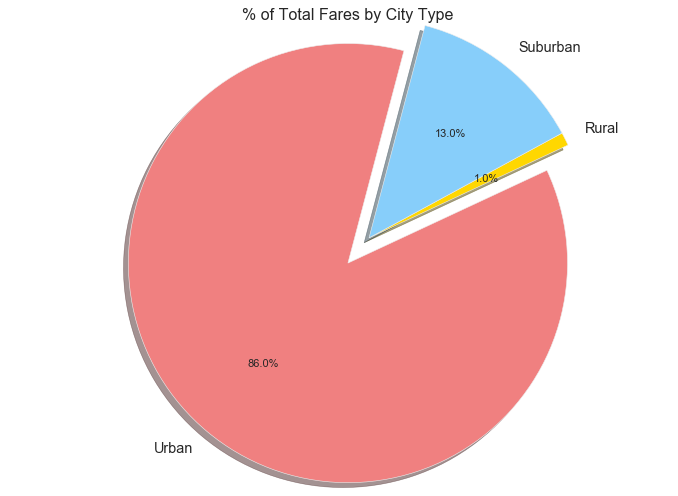

In [347]:
driver_file = file_df.groupby(["type"])
driver_count = driver_file["driver_count"].sum()

explode = (0, 0, .15)
colors = ['gold', 'lightskyblue', 'lightcoral']

driver_count = driver_count.plot(kind="pie", explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=25, title=("% of Total Fares by City Type"))

driver_count.set_ylabel(" ")
plt.axis("equal")
plt.show()